In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import io

In [2]:
save_path = r'E:\My Drive\Nutrition5kDataset'
image_df = pd.read_pickle(os.path.join(save_path, 'dish_images.pkl'))
dishes = pd.read_excel(os.path.join(save_path, 'dishes.xlsx'))
dish_ingredients = pd.read_excel(os.path.join(save_path, 'dish_ingredients.xlsx'))
ingredients = pd.read_excel(os.path.join(save_path, 'ingredients.xlsx'))

In [3]:
dishes

,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103,0.148000,4.625000,0.956000
...,...,...,...,...,...,...
5001,dish_1571934465,0.000000,232,0.000000,0.000000,0.000000
5002,dish_1573073666,0.000000,15,0.000000,0.000000,0.000000
5003,dish_1575924356,0.000000,103,0.000000,0.000000,0.000000
5004,dish_1574359199,0.000000,329,0.000000,0.000000,0.000000


We have a total of 5006 dishes. Some dishes have 0 values for fat, carbs and protein.

In [4]:
dish_ingredients

,dish_id,ingr_id,ingr_name,grams,calories,fat,carb,protein
0,dish_1561662216,ingr_0000000508,soy sauce,3.398568,1.801241,0.020391,0.166530,0.275284
1,dish_1561662216,ingr_0000000122,garlic,2.124105,3.164916,0.010621,0.700955,0.135943
2,dish_1561662216,ingr_0000000026,white rice,8.496420,11.045346,0.025489,2.378998,0.229403
3,dish_1561662216,ingr_0000000524,parsley,0.213397,0.079170,0.001707,0.013657,0.006189
4,dish_1561662216,ingr_0000000094,onions,1.707173,0.682869,0.001707,0.153646,0.018779
...,...,...,...,...,...,...,...,...
28450,dish_1576171157,ingr_0000000077,almonds,0.294420,1.702042,0.145738,0.066833,0.065950
28451,dish_1576171157,ingr_0000000161,olive oil,1.430858,12.648785,1.430858,0.000000,0.000000
28452,dish_1576171157,ingr_0000000203,chili,0.953905,0.381562,0.003816,0.084898,0.017170
28453,dish_1576171157,ingr_0000000291,salt,0.008412,0.000000,0.000000,0.000000,0.000000


In [7]:
print(dishes[dishes['total_fat'] == 0].shape, dishes[dishes['total_carb'] == 0].shape, dishes[dishes['total_protein'] == 0].shape)
print(dishes[(dishes['total_fat'] == 0) & (dishes['total_carb'] == 0) & (dishes['total_protein'] == 0)].shape)
print(dishes[~((dishes['total_fat'] == 0) & (dishes['total_carb'] == 0) & (dishes['total_protein'] == 0))].shape)

(271, 6) (306, 6) (240, 6)
(240, 6)
(4766, 6)


Fat, Carbs and Protein data is not available for 240 dishes out of 5006

In [8]:
print(dish_ingredients.shape)
dish_ingredients.groupby('dish_id')['ingr_id'].count().describe()

(28455, 8)


count    5006.000000
mean        5.684179
std         6.273514
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max        34.000000
Name: ingr_id, dtype: float64

There are a total of 28,455 DishXIngredients with an average of 5.6 ingredients per dish and max of 34 ingredients in a dish 

In [9]:
image_df = pd.merge(image_df, dishes, left_on='dish', right_on='dish_id', how='left').drop('dish_id', axis=1)
image_df

,dish,rgb_image,depth_image,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1559243887,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,289.050018,50,24.750000,11.350000,11.200001
1,dish_1563568319,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,604.323303,347,28.784986,53.148632,37.726025
2,dish_1558641007,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,23.369999,57,0.114000,5.700000,0.513000
3,dish_1558109945,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,74.360001,143,0.286000,0.429000,20.020000
4,dish_1563216412,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,172.449982,205,0.714000,36.610001,5.238000
...,...,...,...,...,...,...,...,...
3485,dish_1563564828,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,452.214478,355,25.004564,38.766243,34.570633
3486,dish_1566587689,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,196.846970,270,7.475343,15.383455,18.580095
3487,dish_1575307819,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.000000,114,0.000000,0.000000,0.000000
3488,dish_1559242155,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,116.116005,203,0.203000,30.855999,0.812000


In [10]:
def wrap_text_by_words(text, max_chars=60):
    """
    Wraps text at word boundaries so lines are no longer than max_chars.
    """
    words = text.split()
    lines = []
    current_line = ""
    
    for word in words:
        if len(current_line + " " + word) <= max_chars:
            current_line += " " + word if current_line else word
        else:
            lines.append(current_line)
            current_line = word
    if current_line:
        lines.append(current_line)
    
    return '\n'.join(lines)


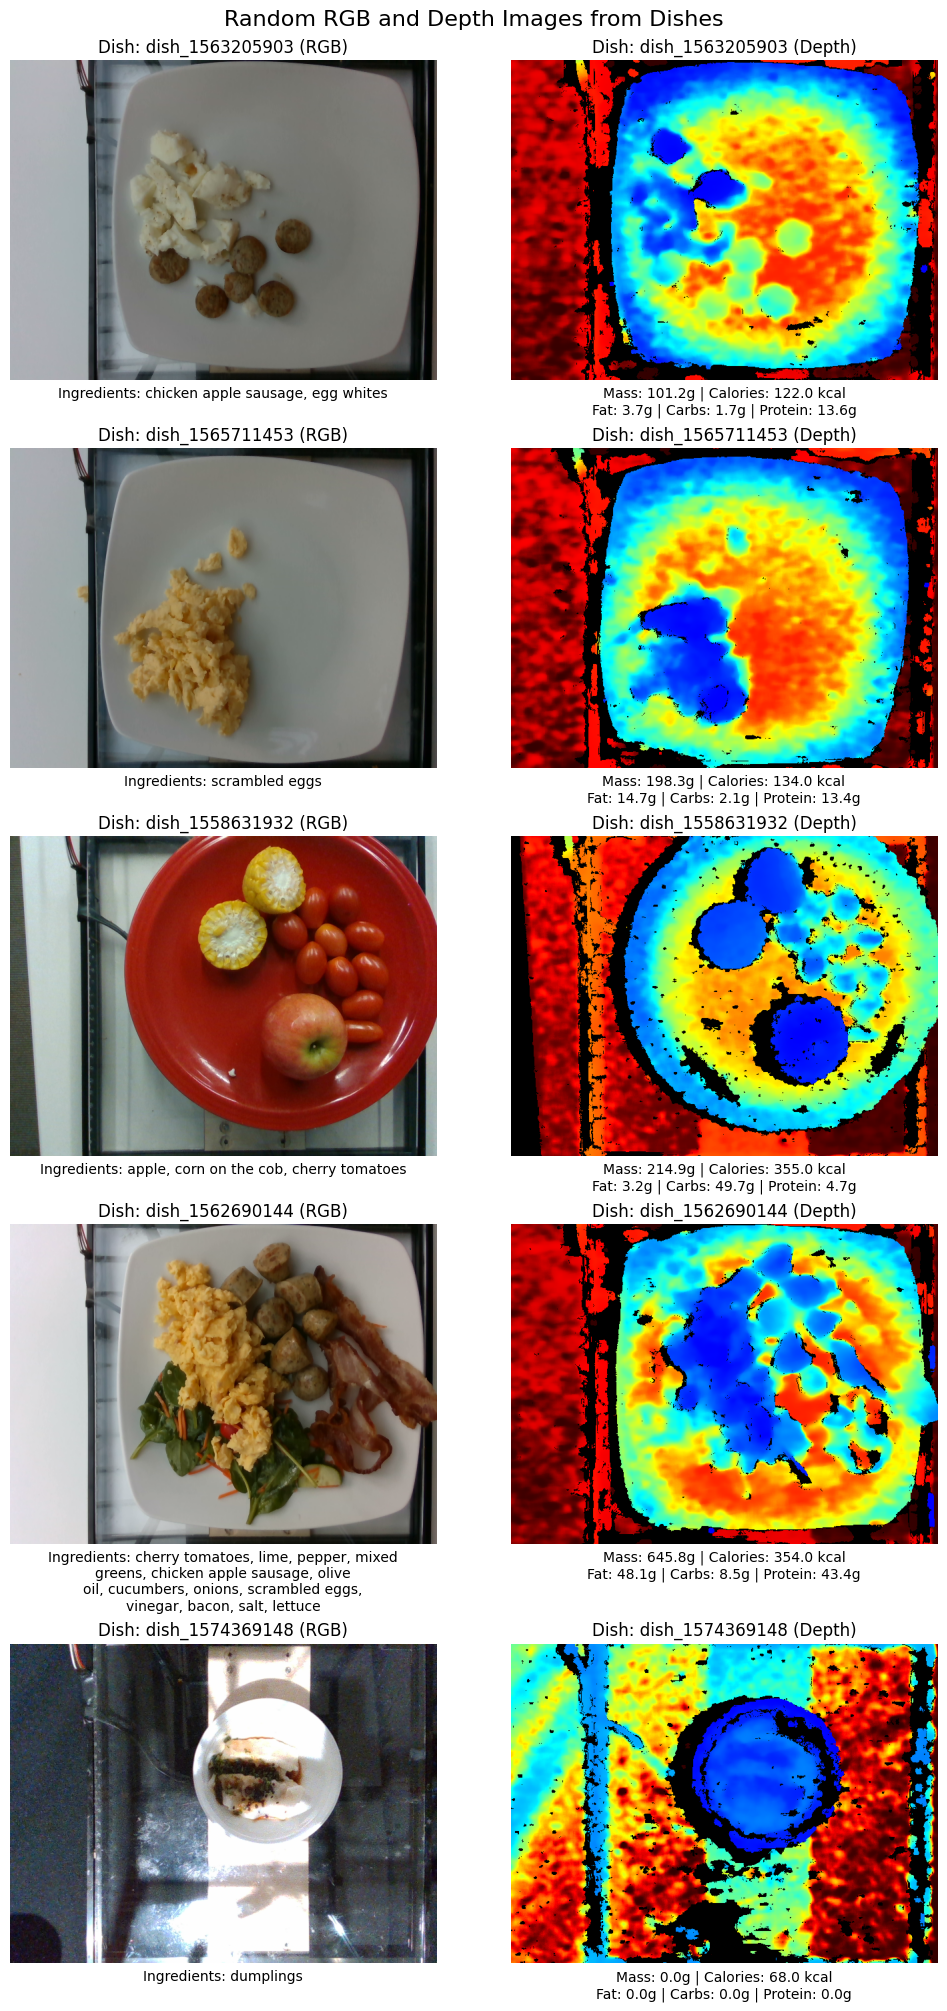

In [11]:
images_to_plot = 5
figsize = (10, 20)

# Pick 5 random rows
sample_df = image_df.sample(images_to_plot, random_state=42).reset_index(drop=True)

# Plot the images
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=figsize, constrained_layout=True)
fig.suptitle("Random RGB and Depth Images from Dishes", fontsize=16)

for i in range(5):
    # Get the dish ID and list of ingredients
    dish_id = sample_df.loc[i, 'dish']
    ingredients_list = ', '.join(dish_ingredients[
        dish_ingredients['dish_id'] == dish_id]['ingr_name'].values)
    ingredients_list = wrap_text_by_words(ingredients_list, figsize[1] * 2)

    # Decode RGB image
    rgb_bytes = sample_df.loc[i, 'rgb_image']
    rgb_image = Image.open(io.BytesIO(rgb_bytes))

    # Decode Depth image
    depth_bytes = sample_df.loc[i, 'depth_image']
    depth_image = Image.open(io.BytesIO(depth_bytes))

    # Plot RGB
    axes[i, 0].imshow(rgb_image)
    axes[i, 0].set_title(f"Dish: {dish_id} (RGB)")
    axes[i, 0].axis('off')

    # Plot Depth
    axes[i, 1].imshow(depth_image, cmap='plasma')
    axes[i, 1].set_title(f"Dish: {dish_id} (Depth)")
    axes[i, 1].axis('off')

    # Position ingredients list under RGB image
    axes[i, 0].text(
        0.5, -0.02, f"Ingredients: {ingredients_list}",
        transform=axes[i, 0].transAxes,
        ha='center', va='top', fontsize=10, wrap=True
    )

    # Add nutrient info as text below depth image
    nutrients = (
        f"Mass: {sample_df.loc[i, 'total_mass']:.1f}g | "
        f"Calories: {sample_df.loc[i, 'total_calories']:.1f} kcal\n"
        f"Fat: {sample_df.loc[i, 'total_fat']:.1f}g | "
        f"Carbs: {sample_df.loc[i, 'total_carb']:.1f}g | "
        f"Protein: {sample_df.loc[i, 'total_protein']:.1f}g"
    )

    # Position text under depth image
    axes[i, 1].text(
        0.5, -0.02, nutrients,
        transform=axes[i, 1].transAxes,
        ha='center', va='top', fontsize=10
    )

plt.show()

# Baseline Model

In [25]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import io
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Split the data
train_df, val_df = train_test_split(image_df[image_df[['total_mass', 'total_fat', 'total_carb', 'total_protein']].sum(axis=1) > 0], test_size=0.2, random_state=42)
train_df.shape, val_df.shape

((2608, 8), (652, 8))

In [28]:
# Image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset class
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(io.BytesIO(row['rgb_image'])).convert("RGB")
        if self.transform:
            image = self.transform(image)
        targets = torch.tensor([
            row['total_calories'],
            row['total_fat'],
            row['total_carb'],
            row['total_protein']
        ], dtype=torch.float32)
        return image, targets

# Data loaders
train_loader = DataLoader(DishDataset(train_df, transform), batch_size=8, shuffle=True)
val_loader = DataLoader(DishDataset(val_df, transform), batch_size=8, shuffle=False)

In [33]:
# Model definition
class NutrientPredictor(nn.Module):
    def __init__(self):
        super(NutrientPredictor, self).__init__()
        base_model = models.resnet18(pretrained=True)
        base_model.fc = nn.Identity()
        self.feature_extractor = base_model
        self.regressor = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 4)
        )

    def forward(self, x):
        features = self.feature_extractor(x)
        return self.regressor(features)

# Train + Evaluate
def train_model(model, train_loader, val_loader, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, targets in tqdm(list(train_loader)):
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, targets in val_loader:
            images = images.to(device)
            preds = model(images).cpu().numpy()
            y_pred.append(preds)
            y_true.append(targets.numpy())

    y_true = np.vstack(y_true)
    y_pred = np.vstack(y_pred)
    mse = mean_squared_error(y_true, y_pred, multioutput='raw_values')
    r2 = r2_score(y_true, y_pred, multioutput='raw_values')

    print("\nValidation Results:")
    print(f"MSE (Calories, Fat, Carbs, Protein): {mse}")
    print(f"R² Scores: {r2}")

    return y_true, y_pred

In [23]:
torch.cuda.is_available()

False

hd-epic dataset - Food nutrient information

In [35]:
# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NutrientPredictor().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

y_true, y_pred = train_model(model, train_loader, val_loader, epochs=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:41<00:00,  2.02it/s]


Epoch 1, Loss: 12384.1617

Validation Results:
MSE (Calories, Fat, Carbs, Protein): [12470.647     161.34883   230.06464   298.00363]
R² Scores: [0.5101001  0.2023465  0.19131517 0.3085376 ]


In [36]:
y_true, y_pred

(array([[3.2900000e+02, 5.3629999e+00, 1.4953000e+01, 4.8435001e+01],
        [9.0000000e+01, 2.1600001e+00, 1.9799999e+01, 2.7900000e+00],
        [2.5500000e+02, 2.2101429e+01, 4.3194996e+01, 2.3418005e+01],
        ...,
        [1.9300000e+02, 2.7140000e+00, 2.3712000e+01, 4.4860001e+00],
        [4.4000000e+01, 1.4045050e+00, 3.6885619e+00, 2.7278211e+00],
        [3.2000000e+01, 1.2800001e-01, 2.2400000e+00, 7.6800001e-01]],
       dtype=float32),
 array([[2.8420798e+02, 2.5728323e+01, 3.8642689e+01, 4.4804108e+01],
        [1.0681355e+00, 1.5199788e-01, 8.7365031e-02, 1.8147932e-01],
        [1.7997418e+02, 1.6301399e+01, 2.4492943e+01, 2.8431372e+01],
        ...,
        [2.5481232e+02, 2.3094683e+01, 3.4622551e+01, 4.0205147e+01],
        [2.0274885e+00, 2.4813944e-01, 2.1998374e-01, 3.3489674e-01],
        [2.1890950e+00, 2.5138909e-01, 2.4540822e-01, 3.6444527e-01]],
       dtype=float32))

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NutrientPredictor().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_model(model, train_loader, val_loader, epochs=20)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:49<00:00,  6.61it/s]


Epoch 1, Loss: 11761.8761


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:49<00:00,  6.65it/s]


Epoch 2, Loss: 3388.0075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:49<00:00,  6.59it/s]


Epoch 3, Loss: 2185.5619


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.81it/s]


Epoch 4, Loss: 1906.7107


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:48<00:00,  6.70it/s]


Epoch 5, Loss: 1490.2587


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 6, Loss: 1167.5169


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 7, Loss: 1067.9691


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.81it/s]


Epoch 8, Loss: 842.1394


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:48<00:00,  6.78it/s]


Epoch 9, Loss: 753.1643


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:48<00:00,  6.76it/s]


Epoch 10, Loss: 725.1231


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:48<00:00,  6.79it/s]


Epoch 11, Loss: 727.8166


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 12, Loss: 760.6755


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.81it/s]


Epoch 13, Loss: 678.8375


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 14, Loss: 591.8034


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:48<00:00,  6.78it/s]


Epoch 15, Loss: 589.5978


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.79it/s]


Epoch 16, Loss: 579.8630


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 17, Loss: 521.4257


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 18, Loss: 482.2622


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.79it/s]


Epoch 19, Loss: 454.1488


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:47<00:00,  6.80it/s]


Epoch 20, Loss: 513.6848

Validation Results:
MSE (Calories, Fat, Carbs, Protein): [2377.5955   158.82362  172.31895  223.64697]
R² Scores: [0.906598   0.21483034 0.39429313 0.4810685 ]


In [30]:
# with 224X224 images
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NutrientPredictor().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_model(model, train_loader, val_loader, epochs=20)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [01:55<00:00,  2.82it/s]


Epoch 1, Loss: 12965.6633


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [01:55<00:00,  2.83it/s]


Epoch 2, Loss: 3820.3882


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [01:54<00:00,  2.84it/s]


Epoch 3, Loss: 2262.2622


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [01:55<00:00,  2.83it/s]


Epoch 4, Loss: 1879.0912


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:02<00:00,  2.67it/s]


Epoch 5, Loss: 1627.5766


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:00<00:00,  2.70it/s]


Epoch 6, Loss: 1248.3637


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:02<00:00,  2.66it/s]


Epoch 7, Loss: 1143.6642


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.63it/s]


Epoch 8, Loss: 952.7627


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.64it/s]


Epoch 9, Loss: 807.4300


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.63it/s]


Epoch 10, Loss: 762.9640


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.64it/s]


Epoch 11, Loss: 681.6489


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:04<00:00,  2.62it/s]


Epoch 12, Loss: 652.4614


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.64it/s]


Epoch 13, Loss: 624.9223


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:04<00:00,  2.61it/s]


Epoch 14, Loss: 550.8337


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.63it/s]


Epoch 15, Loss: 583.5820


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.63it/s]


Epoch 16, Loss: 509.5618


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:04<00:00,  2.62it/s]


Epoch 17, Loss: 507.9442


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:07<00:00,  2.56it/s]


Epoch 18, Loss: 495.4332


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:04<00:00,  2.61it/s]


Epoch 19, Loss: 501.8529


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [02:03<00:00,  2.64it/s]


Epoch 20, Loss: 586.3480

Validation Results:
MSE (Calories, Fat, Carbs, Protein): [2693.6755   167.08821  181.80478  229.34288]
R² Scores: [0.894181   0.17397296 0.36095017 0.46785218]
